### I generate 2-CSV files with of k, test_size, performace_result.  I manually inspect the file for he best combinations. 
- pima-2-predictors-results.csv
- pima-5-predictors-results.csv

### Import

In [1]:
import numpy as np

# read data
data = np.genfromtxt("pima-indians-diabetes-data.csv", delimiter=',', dtype=None, encoding = 'UTF-8', names=True)

# inital import test
data.shape

(538,)

### Set and Shape

In [2]:
x1 = np.reshape(data["Pedigree_fun"],(-1,1))
x2 = np.reshape(data["Age"],(-1,1))
y = data["Diabetes"]

X = np.concatenate((x1,x2), axis=1)

# validate
X[:10]
print(X.size)

1076


### Normalize the predictor variables (Min-max)

In [3]:
from sklearn.preprocessing import MinMaxScaler

# our scaler object
scaler = MinMaxScaler()

# normalize
norm_X = scaler.fit_transform(X)

# validate
print(norm_X.shape)
print(norm_X[:10,:])


(538, 2)
[[0.         0.        ]
 [0.00256191 0.2244898 ]
 [0.0029889  0.02040816]
 [0.00426985 0.20408163]
 [0.00426985 0.34693878]
 [0.00469684 0.06122449]
 [0.0059778  0.08163265]
 [0.00768574 0.40816327]
 [0.00982067 0.02040816]
 [0.01024765 0.02040816]]


## Rescale

In [4]:
X_trans = scaler.transform(X)

#validate
print(X_trans[:10,:])

[[0.         0.        ]
 [0.00256191 0.2244898 ]
 [0.0029889  0.02040816]
 [0.00426985 0.20408163]
 [0.00426985 0.34693878]
 [0.00469684 0.06122449]
 [0.0059778  0.08163265]
 [0.00768574 0.40816327]
 [0.00982067 0.02040816]
 [0.01024765 0.02040816]]


### loop through k & test_size and store cvs file.  Then manually filter to see the best values and use the k & test_size values to run again to complete the sections.

In [5]:
from sklearn.model_selection import train_test_split as tts
import sklearn.neighbors as nn
import csv

neighbors_array = np.arange(1,41,2)
train_array = np.arange(.1,.8,.1)
filename = "pima-2-predictors-results.csv"

from sklearn.metrics import accuracy_score

with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for i in neighbors_array:
        for j in train_array:
            # split data into train and test
            #from sklearn.model_selection import train_test_split as tts
            X_train, X_test, y_train, y_test = tts (X_trans, y, random_state=0, test_size=j)

            ## create empty model
            #We use this object along with the traiing and test data to train and test a kNN classifier 
            knn_model0 = nn.KNeighborsClassifier(n_neighbors=i)
            knn_model0.fit(X_train, y_train)

            y_pred = knn_model0.predict(X_test)
            s = accuracy_score(y_test, y_pred)
            arr = np.array([i,j,s])
            #print(arr)
            csvwriter.writerow(arr)

C:\Users\kabus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kabus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [6]:
# NOTE - I used the best values from the spreadsheet to complete the last sections
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_trans, y, test_size=.3)

#validate
#print(X_train.size)
#print(X_test.size)

### Training 2-predictor kNN

In [7]:
import sklearn.neighbors as nn

# knn object
knn_model0 = nn.KNeighborsClassifier(n_neighbors=27)

### Fit and Classify

In [8]:
knn_model0.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

### Predict

In [9]:
y_pred = knn_model0.predict(X_test)

C:\Users\kabus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Plot Prediction

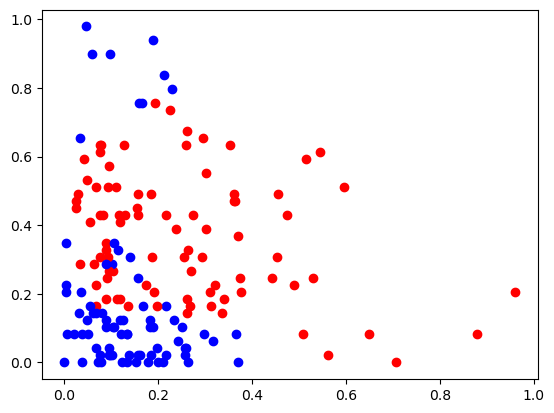

In [10]:
import matplotlib.pyplot as plt

#PLOT the predicted classes
for i in range(X_test.shape[0]):
    if(y_pred[i] == 0):
        #  plt.scatter(X Column,Y Column, c='b')
       plt.scatter(X_test[i,0],X_test[i,1], c='b') #budget on x-axis, duration on y-axis
    else:
       plt.scatter(X_test[i,0], X_test[i,1], c= 'r')
plt.show()

### Plot Actual

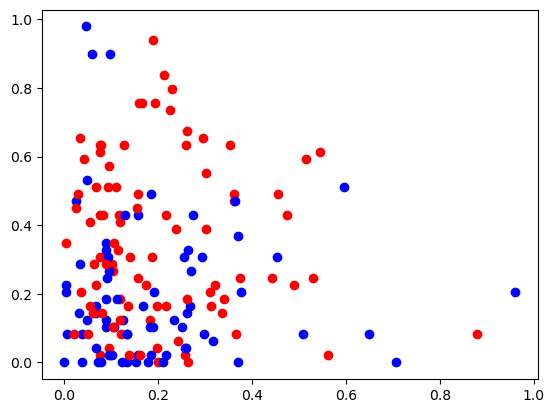

In [11]:
#PLOT the actual classes
for i in range(X_test.shape[0]):
    if(y_test[i] == 0):
        #  plt.scatter(X Column,Y Column, c='b')
       plt.scatter(X_test[i,0],X_test[i,1], c='b') #budget on x-axis, duration on y-axis
    else:
       plt.scatter(X_test[i,0], X_test[i,1], c= 'r')
plt.show()

### Performance

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.5987654320987654


## Train with 5 - kNN predictors

In [13]:
x1 = np.reshape(data["Pedigree_fun"],(-1,1))
x2 = np.reshape(data["Age"],(-1,1))
x3 = np.reshape(data["BMI"],(-1,1))
x4 = np.reshape(data["Plasma_glucose"],(-1,1))
x5 = np.reshape(data["ser_insulin"],(-1,1))

X = np.concatenate((x1,x2,x3,x4,x5),axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X) 
norm_X = scaler.transform(X)

norm_X.shape

X_trans1 = scaler.transform(X)

#validate
#print(X_trans1[:10,:])

In [15]:
from sklearn.model_selection import train_test_split as tts
import sklearn.neighbors as nn
from sklearn.metrics import accuracy_score
import csv

neighbors_array = np.arange(1,41,2)
train_array = np.arange(.1,.8,.1)
filename = "pima-5-predictors-results.csv"

with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for i in neighbors_array:
        for j in train_array:
            X_train1, X_test1, y_train1, y_test1 = tts (X_trans1, y, random_state=0, test_size=j)

            ## create empty model
            #We use this object along with the traiing and test data to train and test a kNN classifier 
            knn_model1 = nn.KNeighborsClassifier(n_neighbors=i)
            knn_model1.fit(X_train1, y_train1)

            y_pred1 = knn_model1.predict(X_test1)
            s1 = accuracy_score(y_test1, y_pred1)
            arr1 = np.array([i,j,s1])
            #print(arr)
            csvwriter.writerow(arr1)

C:\Users\kabus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kabus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [16]:
# NOTE - I used the best values from the spreadsheet to complete the last sections
# split data into train and test
from sklearn.model_selection import train_test_split as tts
X_train1, X_test1, y_train1, y_test1 = tts (X_trans1, y, random_state=0, test_size=0.4)

In [17]:
## create empty model
# We use this object along with the training and test data to train and test a kNN classifier
knn_model1 = nn.KNeighborsClassifier(n_neighbors=17)
knn_model1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=17)

In [18]:
y_pred1 = knn_model1.predict(X_test1)
print(accuracy_score(y_test1, y_pred1))

0.7361111111111112


C:\Users\kabus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Training an ANN with 5-predictors

In [19]:
import sklearn.neural_network as ann

ann_model0 = ann.MLPClassifier((25), activation = 'logistic', max_iter = 1680)
ann_model0.fit(X_train1, y_train1)

y_pred = ann_model0.predict(X_test1)

print(accuracy_score(y_test1, y_pred))

0.7222222222222222


### Accuracy

In [20]:
print(accuracy_score(y_test1, y_pred))

0.7222222222222222
